In [1]:
import numpy as np
import pandas as pd

In [5]:
# Daten einlesen
data = pd.read_csv("sales_subset.csv", sep=";")
data

,Column1,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,05.02.2010,24924.50,FALSCH,5.727778,0.679451,8.106
1,1,1,A,1,05.03.2010,21827.90,FALSCH,8.055556,0.693452,8.106
2,2,1,A,1,02.04.2010,57258.43,FALSCH,16.816667,0.718284,7.808
3,3,1,A,1,07.05.2010,17413.94,FALSCH,22.527778,0.748928,7.808
4,4,1,A,1,04.06.2010,17558.09,FALSCH,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...,...
10769,10769,39,A,99,09.12.2011,895.00,FALSCH,9.644444,0.834256,7.716
10770,10770,39,A,99,03.02.2012,350.00,FALSCH,15.938889,0.887619,7.244
10771,10771,39,A,99,08.06.2012,450.00,FALSCH,27.288889,0.911922,6.989
10772,10772,39,A,99,13.07.2012,0.06,FALSCH,25.644444,0.860145,6.623


In [6]:
# Daten selektieren
data_select = data[["weekly_sales", "temperature_c", "fuel_price_usd_per_l", "unemployment"]]
data_select

,weekly_sales,temperature_c,fuel_price_usd_per_l,unemployment
0,24924.50,5.727778,0.679451,8.106
1,21827.90,8.055556,0.693452,8.106
2,57258.43,16.816667,0.718284,7.808
3,17413.94,22.527778,0.748928,7.808
4,17558.09,27.050000,0.714586,7.808
...,...,...,...,...
10769,895.00,9.644444,0.834256,7.716
10770,350.00,15.938889,0.887619,7.244
10771,450.00,27.288889,0.911922,6.989
10772,0.06,25.644444,0.860145,6.623


In [8]:
# b Vektor definieren
b = np.array(list(data_select["weekly_sales"])).reshape(-1,1)

# A Matrix definieren
# dazu werden die Spalten in Arrays umgewandelt und dann in eine Matrix zusammengefügt
A_temp = np.array(list(data_select["temperature_c"])).reshape(-1,1)
A_fuel = np.array(list(data_select["fuel_price_usd_per_l"])).reshape(-1,1)
A_unemp = np.array(list(data_select["unemployment"])).reshape(-1,1)
# zum "auffüllen" mit Einser wird noch eine Spalte mit Einsen erstellt
A_ones = np.ones(data_select.shape[0]).reshape(-1,1)

# A Matrix zusammenfügen/definieren
A = np.hstack([A_ones, A_temp, A_fuel, A_unemp])
A

array([[ 1.        ,  5.72777778,  0.67945084,  8.106     ],
       [ 1.        ,  8.05555556,  0.69345196,  8.106     ],
       [ 1.        , 16.81666667,  0.71828415,  7.808     ],
       ...,
       [ 1.        , 27.28888889,  0.91192235,  6.989     ],
       [ 1.        , 25.64444444,  0.86014461,  6.623     ],
       [ 1.        , 22.25      ,  0.95551076,  6.228     ]])

In [9]:
# Parameter x berechnen
x = np.linalg.inv(A.T @ A) @ A.T @ b
print(x)

[[ 30729.17977072]
 [   -96.48438912]
 [-35848.89944971]
 [  2661.49481342]]


In [10]:
# Vorhersage für die wöchentlichen Verkäufe
b_hat = A @ x
b_hat

array([[27393.05078006],
       [26666.53164084],
       [24137.88922943],
       ...,
       [14006.00243713],
       [15046.73379955],
       [10904.18250909]])

In [11]:
# Residuen berechnen
res = b - b_hat
res

array([[ -2468.55078006],
       [ -4838.63164084],
       [ 33120.54077057],
       ...,
       [-13556.00243713],
       [-15046.67379955],
       [ -9989.18250909]])

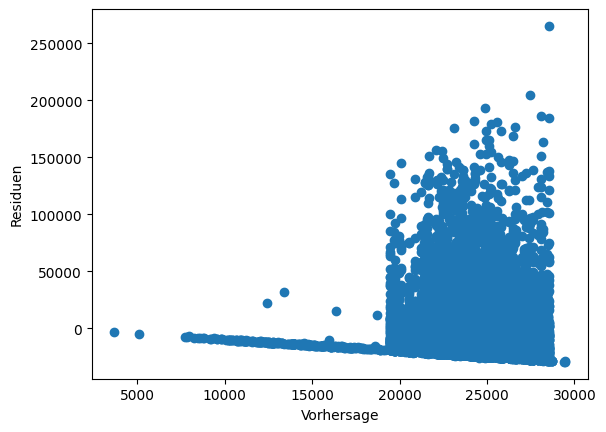

In [12]:
# Residuen plotten
import matplotlib.pyplot as plt
plt.scatter(b_hat, res)
plt.xlabel("Vorhersage")
plt.ylabel("Residuen")
plt.show()


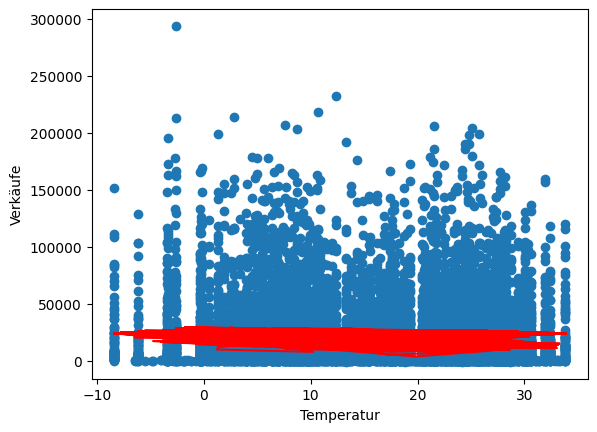

In [13]:
# Regressionsgerade plotten
plt.scatter(A[:,1], b)
plt.plot(A[:,1], b_hat, color="red")
plt.xlabel("Temperatur")
plt.ylabel("Verkäufe")
plt.show()
